In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2015-01-01'
end = '2021-12-31'

df = data.DataReader('BTC-USD','yahoo', start ,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,320.192993,310.210999,310.914001,320.192993,13942900,320.192993
2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,51956.328125,50499.468750,50802.609375,50640.417969,24324345758,50640.417969
2021-12-28,50679.859375,47414.210938,50679.859375,47588.855469,33430376883,47588.855469
2021-12-29,48119.742188,46201.496094,47623.871094,46444.710938,30049226299,46444.710938
2021-12-30,47879.964844,46060.312500,46490.605469,47178.125000,26686491018,47178.125000
2021-12-31,48472.527344,45819.953125,47169.371094,46306.445312,36974172400,46306.445312


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,320.192993,310.210999,310.914001,320.192993,13942900,320.192993
1,2015-01-01,320.434998,314.002991,320.434998,314.248993,8036550,314.248993
2,2015-01-02,315.838989,313.565002,314.079010,315.032013,7860650,315.032013
3,2015-01-03,315.149994,281.082001,314.846008,281.082001,33054400,281.082001
4,2015-01-04,287.230011,257.612000,281.145996,264.195007,55629100,264.195007


In [5]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,320.192993,310.210999,310.914001,320.192993,13942900
1,320.434998,314.002991,320.434998,314.248993,8036550
2,315.838989,313.565002,314.079010,315.032013,7860650
3,315.149994,281.082001,314.846008,281.082001,33054400
4,287.230011,257.612000,281.145996,264.195007,55629100


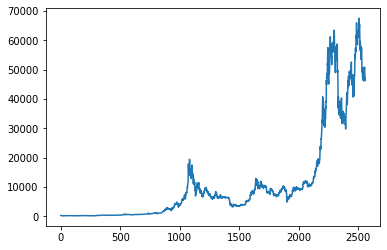

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,320.192993,310.210999,310.914001,320.192993,13942900
1,320.434998,314.002991,320.434998,314.248993,8036550
2,315.838989,313.565002,314.079010,315.032013,7860650
3,315.149994,281.082001,314.846008,281.082001,33054400
4,287.230011,257.612000,281.145996,264.195007,55629100
...,...,...,...,...,...
2553,51956.328125,50499.468750,50802.609375,50640.417969,24324345758
2554,50679.859375,47414.210938,50679.859375,47588.855469,33430376883
2555,48119.742188,46201.496094,47623.871094,46444.710938,30049226299
2556,47879.964844,46060.312500,46490.605469,47178.125000,26686491018


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2553    54702.148125
2554    54705.434492
2555    54741.443594
2556    54806.288086
2557    54833.607461
Name: Close, Length: 2558, dtype: float64

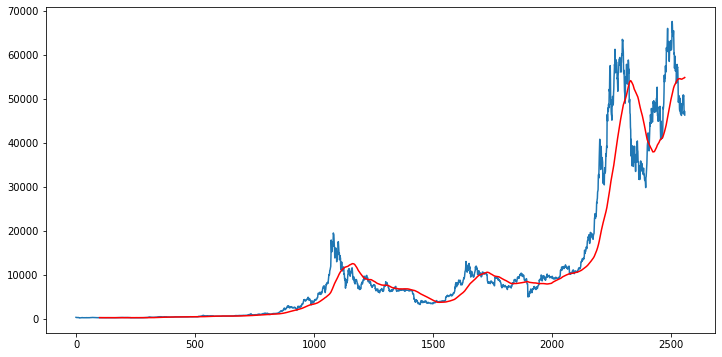

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200


0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2553    47645.100508
2554    47696.372793
2555    47750.833770
2556    47791.235098
2557    47821.674941
Name: Close, Length: 2558, dtype: float64

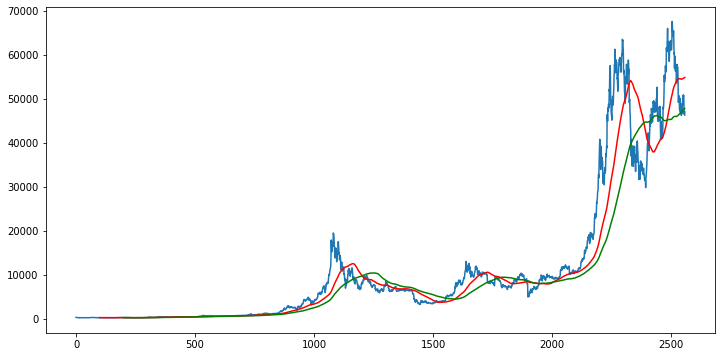

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(2558, 5)

In [13]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1790, 1)
(768, 1)


In [14]:
data_training.head()

,Close
0,320.192993
1,314.248993
2,315.032013
3,281.082001
4,264.195007


In [15]:
data_testing.head()

,Close
1790,7146.133789
1791,7218.371094
1792,7531.663574
1793,7463.105957
1794,7761.243652


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00735482],
       [0.00704715],
       [0.00708768],
       ...,
       [0.36846447],
       [0.37370375],
       [0.35559337]])

In [18]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(1690, 100, 1)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
53/53 [==============================] - 25s 335ms/step - loss: 0.0169
Epoch 2/50
53/53 [==============================] - 17s 323ms/step - loss: 0.0055
Epoch 3/50
53/53 [==============================] - 17s 321ms/step - loss: 0.0055
Epoch 4/50
53/53 [==============================] - 17s 321ms/step - loss: 0.0046
Epoch 5/50
53/53 [==============================] - 17s 320ms/step - loss: 0.0044
Epoch 6/50
53/53 [==============================] - 17s 318ms/step - loss: 0.0042
Epoch 7/50
53/53 [==============================] - 17s 318ms/step - loss: 0.0035
Epoch 8/50
53/53 [==============================] - 17s 319ms/step - loss: 0.0040
Epoch 9/50
53/53 [==============================] - 17s 318ms/step - loss: 0.0034
Epoch 10/50
53/53 [==============================] - 17s 317ms/step - loss: 0.0032
Epoch 11/50
53/53 [==============================] - 17s 317ms/step - loss: 0.0031
Epoch 12/50
53/53 [==============================] - 17s 317ms/step - loss: 0.0032
Epoch 13/50
5

In [24]:
 model.save('keras_model.h5')

In [29]:
data_testing.head()

,Close
1790,7146.133789
1791,7218.371094
1792,7531.663574
1793,7463.105957
1794,7761.243652


In [25]:
past_100_days = data_training.tail(100)

In [26]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\kaust\AppData\Local\Temp\ipykernel_7320\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [27]:
final_df.head()

,Close
0,10231.744141
1,10345.810547
2,10916.053711
3,10763.232422
4,10138.049805


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[8.40461481e-02],
       [8.58684105e-02],
       [9.49783025e-02],
       [9.25369134e-02],
       [8.25493388e-02],
       [8.24376043e-02],
       [8.68613534e-02],
       [8.28993791e-02],
       [8.25568117e-02],
       [8.62679528e-02],
       [8.33073771e-02],
       [7.64207251e-02],
       [7.25191579e-02],
       [7.39245764e-02],
       [7.44436225e-02],
       [7.64774036e-02],
       [8.58835903e-02],
       [9.03052645e-02],
       [8.98412276e-02],
       [8.95383336e-02],
       [8.59881016e-02],
       [8.86073112e-02],
       [8.73935201e-02],
       [8.56953015e-02],
       [8.21966932e-02],
       [8.31935052e-02],
       [8.68958941e-02],
       [8.61038300e-02],
       [8.60639226e-02],
       [8.58988013e-02],
       [8.47658391e-02],
       [8.41983674e-02],
       [8.35110329e-02],
       [8.46000314e-02],
       [8.32457375e-02],
       [8.06589156e-02],
       [8.14684841e-02],
       [7.60197631e-02],
       [5.83068564e-02],
       [5.61729636e-02],


In [29]:
input_data.shape

(868, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(768, 100, 1)
(768,)


In [32]:
# Making Predictions

y_predicted = model.predict(x_test)

In [33]:
y_predicted.shape

(768, 1)

In [34]:
y_test

array([3.47521297e-02, 3.59061533e-02, 4.09111421e-02, 3.98159032e-02,
       4.45787875e-02, 4.15176710e-02, 3.91958404e-02, 3.75614846e-02,
       3.75320455e-02, 3.64439441e-02, 3.95794930e-02, 4.11560938e-02,
       4.13037263e-02, 4.14332461e-02, 3.88221256e-02, 3.68606631e-02,
       3.58910749e-02, 3.63017563e-02, 3.67259092e-02, 3.44092972e-02,
       3.48506658e-02, 3.13389215e-02, 2.66746435e-02, 3.68396251e-02,
       3.56581047e-02, 3.59132673e-02, 3.54714229e-02, 4.05904396e-02,
       3.80989010e-02, 3.75701744e-02, 3.68133140e-02, 3.62351789e-02,
       3.70518693e-02, 3.74976140e-02, 3.91696463e-02, 3.70983057e-02,
       3.55104098e-02, 3.56154515e-02, 3.21854566e-02, 3.79272585e-02,
       3.89780033e-02, 3.89885573e-02, 4.47062011e-02, 5.10080877e-02,
       4.96688721e-02, 4.64611372e-02, 5.10538065e-02, 4.89927080e-02,
       5.14682087e-02, 5.06965975e-02, 6.16169419e-02, 6.12853889e-02,
       5.99558382e-02, 6.32348308e-02, 6.34548209e-02, 5.96756125e-02,
      

In [35]:
y_predicted

array([[0.06071373],
       [0.05978875],
       [0.05868954],
       [0.05743974],
       [0.05607229],
       [0.05462863],
       [0.05315037],
       [0.051673  ],
       [0.05022332],
       [0.04882021],
       [0.04747497],
       [0.04619588],
       [0.0449909 ],
       [0.0438671 ],
       [0.04282981],
       [0.04188013],
       [0.04101372],
       [0.04022179],
       [0.03949379],
       [0.03881965],
       [0.03818898],
       [0.03759169],
       [0.03701708],
       [0.03645099],
       [0.03588443],
       [0.03531688],
       [0.03475171],
       [0.03419439],
       [0.03365396],
       [0.03314122],
       [0.0326646 ],
       [0.03222954],
       [0.03183811],
       [0.03149016],
       [0.0311846 ],
       [0.03092057],
       [0.03069673],
       [0.03050912],
       [0.03035183],
       [0.03021675],
       [0.03009637],
       [0.02998827],
       [0.02989294],
       [0.0298152 ],
       [0.02976769],
       [0.02976762],
       [0.02982885],
       [0.029

In [36]:
scaler.scale_

array([1.59754515e-05])

In [37]:
scale_factor = 1/1.59754515e-05
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

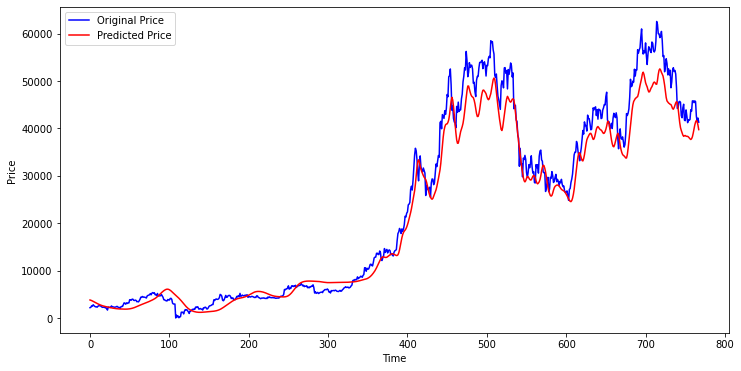

In [38]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price') 
plt.legend()
plt.show()